### **Objectives**

Perform a small Exploratory Data Analysis (EDA) to understand more about the dataset.

**ATTENTION**: The results of this analysis can best be observed using the platform [Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/), because some of them were created </br> using the Plotly library and will not display correctly on Github.

#### 1. Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### 2. Reading the "business_EDITED.pkl" and creating the dataset

The "business_EDITED" file was generated in the last step of the [previous step](./2_Business_DATA_PROCESSING.ipynb)

In [2]:
# Reading the "business_EDITED.pkl" file and creating the dataset
business = pd.read_pickle('..\\INPUT\\business_EDITED.pkl')

# Displaying the first few lines of the dataset to confirm that the file was read correctly
business.head(3)


,city,state,stars,review_count,is_open,category_Acupuncture,category_Doctors,category_Health&Medical,category_Naturopathic/Holistic,category_Nutritionists,...,subattribute_DietaryRestrictions_halal,subattribute_DietaryRestrictions_soy-free,subattribute_DietaryRestrictions_vegetarian,hours_None,hours_Monday,hours_Tuesday,hours_Saturday,hours_Sunday,le_city,le_state
0,Santa Barbara,CA,5.0,7,0,1,1,1,1,1,...,0,0,0,1,0,0,0,0,1007,2
1,Affton,MO,3.0,15,1,0,0,0,0,0,...,0,0,0,0,1,1192,1171,0,6,13
2,Tucson,AZ,3.5,22,0,0,0,0,0,0,...,0,0,0,0,1115,1205,1205,1111,1210,1


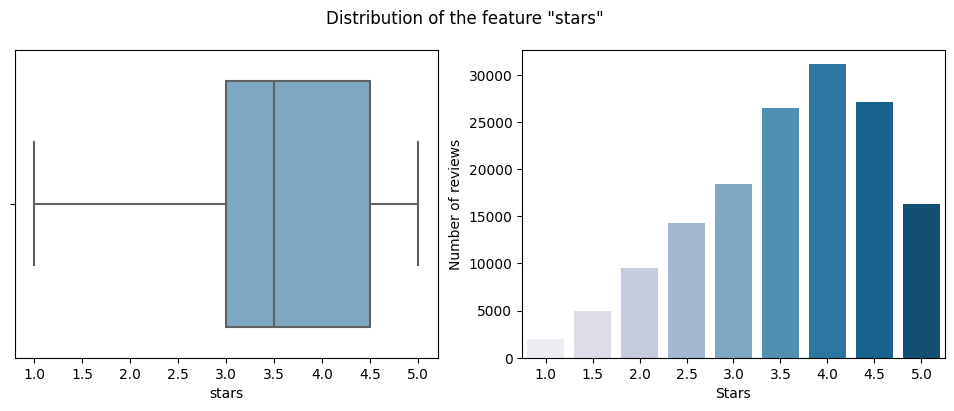

In [3]:
# Checking the distribution of the feature 'stars' (which will be the target of our future model)

stars = business['stars'].agg('value_counts')

fig, ax = plt.subplots(1,2, figsize=[12,4])

sns.boxplot(ax=ax[0],
            data=business,
            x='stars',
            palette='PuBu'
           )

sns.barplot(ax=ax[1],
            x=stars.index,
            y=stars,
            palette='PuBu'
           )

fig.suptitle('Distribution of the feature "stars"')
ax[1].set_xlabel('Stars')
ax[1].set_ylabel('Number of reviews')
plt.show()

We see that 50% of the registered businesses are rated with a maximum of 3.5 stars, with the vast majority of them below 3 stars.

We have only 25% of the businesses achieving the maximum score.

In [4]:
# Creating a Dataframe containing the TOTAL amount of business (open and closed) grouped by State

df_total_business = business[['state','is_open']].groupby('state').sum()
df_total_business['total'] = business[['state','is_open']].groupby('state').count()
df_total_business = df_total_business.sort_values(by='total', ascending=False).reset_index()

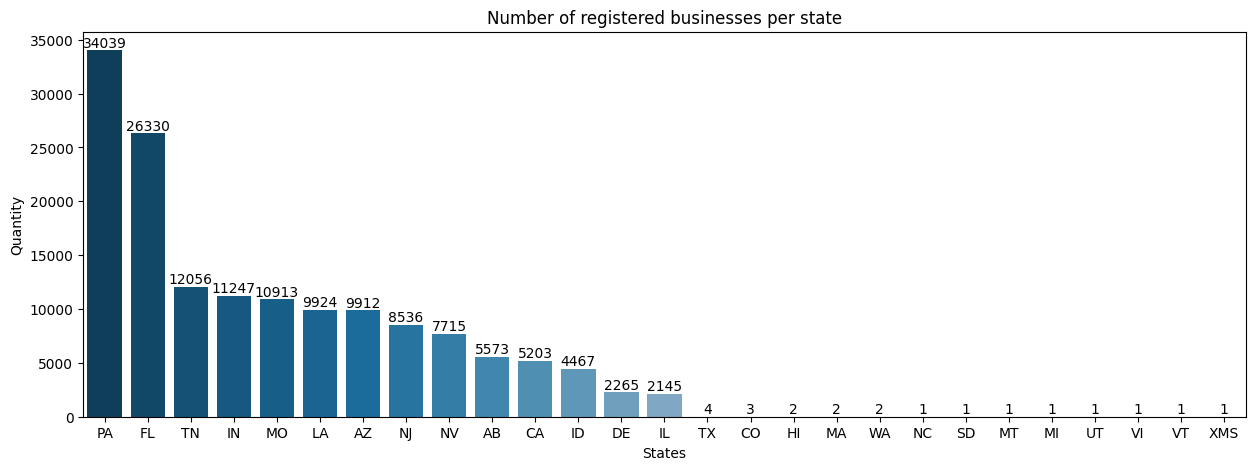

In [5]:
# Plotting the chart containing the states with the most registered businesses

fig, ax = plt.subplots(figsize=[15,5])

ax = sns.barplot(x=df_total_business['state'],
                 y=df_total_business['total'],
                 palette='PuBu_r',
                 order=df_total_business['state']
                )
for i in ax.containers:
    ax.bar_label(i,)

ax.set(xlabel='States',
       ylabel='Quantity',
       title='Number of registered businesses per state'
      )
plt.show()

I noticed "different" acronyms (not part of the US) like AB and XMS and decided to investigate.

XMS refers to Liverpool (UK) while AB apparently refers to Alberta (Canada).

But upon further investigation I noticed several strange cities that do not belong to Canada (filling errors?).

In [6]:
pd.Series(business[business['state']=='AB']['city'].unique())

0                          Edmonton
1                         St Albert
2                     Sherwood Park
3                        St. Albert
4                          Beaumont
5                      Saint Albert
6                       NW Edmonton
7                     Staint Albert
8                      Spruce Grove
9                     West Edmonton
10               Southeast Edmonton
11                         EdMonton
12                     Eaux Claires
13    Pilot Sound Area West Portion
14                   Sturgeon Couny
15                    East Edmonton
16                            Enoch
17                   Old Strathcona
18                         Sherwood
19          Alberta Park Industrial
20                      AB Edmonton
21                Fort Saskatchewan
22             Edmonton City Centre
23                         Downtown
dtype: category
Categories (1416, object): ['AB Edmonton', 'AMBLER', 'ARDMORE', 'AVON', ..., 'wimauma', '​Clayton', '​Largo', '​Lithia']

Since I don't have access to the business team to identify the reason for the inconsistencies I decided to follow the project and plot a different chart with only the states present in the US (consequently I will exclude from this chart the AB and XMS states)

In [7]:
# Plotting the chart containing the states that have the most businesses registered in another way (US only)

fig = px.choropleth(df_total_business,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='total',
                    color_continuous_scale="turbo"
                    )


fig.update_layout(title_text = 'Number of registered businesses per state (US)',
                  title_font_size = 22,
                  title_x=0.5, 
                  )

fig.show()

[View above chart in Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/)

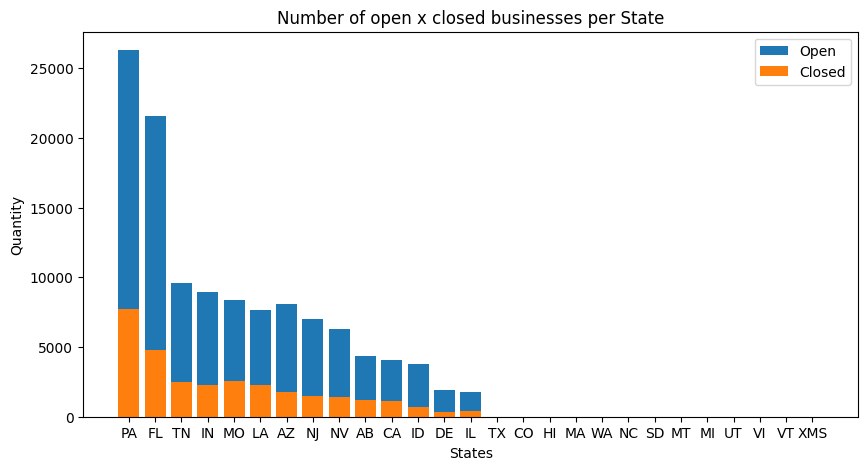

In [8]:
# Plotting the chart with the difference between open x closed businesses per state

fig, ax = plt.subplots(figsize=[10,5])

plt.bar(x=df_total_business['state'], height=df_total_business['is_open'])
plt.bar(x=df_total_business['state'], height=(df_total_business['total'] - df_total_business['is_open']))

ax.set(xlabel='States',
       ylabel='Quantity',
       title='Number of open x closed businesses per State'
      )
      
plt.legend(['Open','Closed'])
plt.show()

In [9]:
# Creating a Dataframe containing the categories and the number of businesses present in each category (All States)

cat_dict = {}

for feature in business:
    if 'category' in feature:
        new_feature = feature.replace('category_','')
        cat_dict[new_feature] = business[feature].sum()

df = pd.DataFrame.from_dict(cat_dict, orient='index').reset_index()
df = df.rename({'index':'categories', 0:'qty'}, axis=1)
df = df.sort_values(by='qty', ascending=False).reset_index(drop=True).head(10)


# Plotting the chart of the categories with the most registered businesses (Top 10)

fig = px.bar(df, y='qty', x='categories', text_auto='.2s',
             labels={
                     "categories": "Categories",
                     "qty": "Quantity"
                     }
            )

fig.update_layout(title_text = 'Ranking of the categories with the most registered businesses (TOP 10)',
                  title_font_size = 22,
                  title_x=0.5, 
                  )
fig.show()

[View above chart in Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/)

In [10]:
# Creating a Dataframe containing the categories and the amount of business present in each of them for a SPECIFIC STATE
# This chart can be used interactively using the link below for Streamlit

opt = 'TX'

cat_dict2 = {}

business2 = business[business['state']==opt]

for feature in business2:
    if 'category' in feature:
        new_feature = feature.replace('category_','')
        cat_dict2[new_feature] = business2[feature].sum()

df2 = pd.DataFrame.from_dict(cat_dict2, orient='index').reset_index()
df2 = df2.rename({'index':'categories', 0:'qty'}, axis=1)
df2 = df2.sort_values(by='qty', ascending=False).reset_index(drop=True).head(10)


# Plotting the chart of the categories with the most registered businesses in the selected state

fig = px.bar(df2, y='qty', x='categories', text_auto='.2s',
             labels={
                     "categories": "Categories",
                     "qty": "Quantity"
                     }
            )

fig.update_layout(title_text = f"Categories with most registered businesses in the state {opt} (TOP 10)",
                  title_font_size = 22,
                  title_x=0.5, 
                  )
fig.show()

[View above chart in Streamlit](https://thiagopastre-portfolio-yelp-projectsourcesstreamlit-c4t962.streamlit.app/)

As the last step in this EDA I decided to check if there were any highly correlated features in the Dataframe, and if so, to drop them.

In [12]:
# Generating a correlation matrix
corr_matrix = business.drop(['city','state'], axis=1).corr().abs()
# Creates an upper triangular array of booleans with dimensions equal to the corr_matrix,
# using np.ones to create an array of 1s and np.triu to keep only the upper triangular part (above the main diagonal).
# Converts the top triangular array of booleans into an array with the same values as the corr_matrix using the where method.
# This method keeps the values of corr_matrix where the boolean array is True and assigns NaN (null value) where it is False.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Identifying features with correlation greater than 0.85
high_corr = [column for column in upper.columns if any(upper[column] > 0.85)]
# Dropping identified Dataframe features
business.drop(high_corr, axis=1, inplace=True)

In [14]:
# Exporting the final dataset to a pickle file

business.to_pickle('../INPUT/business_EDITED.pkl')

> [Next step - Application of Machine Learning models](./4_Business_ML.ipynb)